/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_110_final.mat


Fitting random batch: 100%|██████████| 6/6 [00:10<00:00,  1.77s/it]


Convergence rate for pos_x = 1.2748341017509688
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:08<00:00,  1.36s/it]


Convergence rate for pos_x = 1.1563262939453125
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:07<00:00,  1.29s/it]


Convergence rate for pos_x = 1.2192535400390625
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


Convergence rate for pos_x = 0.9658660888671875
Convergence rate for pos_y = 0.9769668579101562
Convergence rate for height = 1.1260544098210195
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


Convergence rate for pos_x = 1.1160736083984375
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:07<00:00,  1.26s/it]


Convergence rate for pos_x = 1.108551025390625
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:07<00:00,  1.31s/it]


Convergence rate for pos_x = 0.988372802734375
Convergence rate for pos_y = 0.9598121643066406
Convergence rate for height = 1.1024408428726158
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]


Convergence rate for pos_x = 0.948944091796875
Convergence rate for pos_y = 0.9460792541503906
Convergence rate for height = 1.1019403764206677
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:08<00:00,  1.34s/it]


Convergence rate for pos_x = 1.0299835205078125
Convergence not reached


Fitting random batch: 100%|██████████| 6/6 [00:07<00:00,  1.30s/it]


Convergence rate for pos_x = 1.08428955078125
Convergence not reached
Method 'refine' executed in 111.7142 seconds


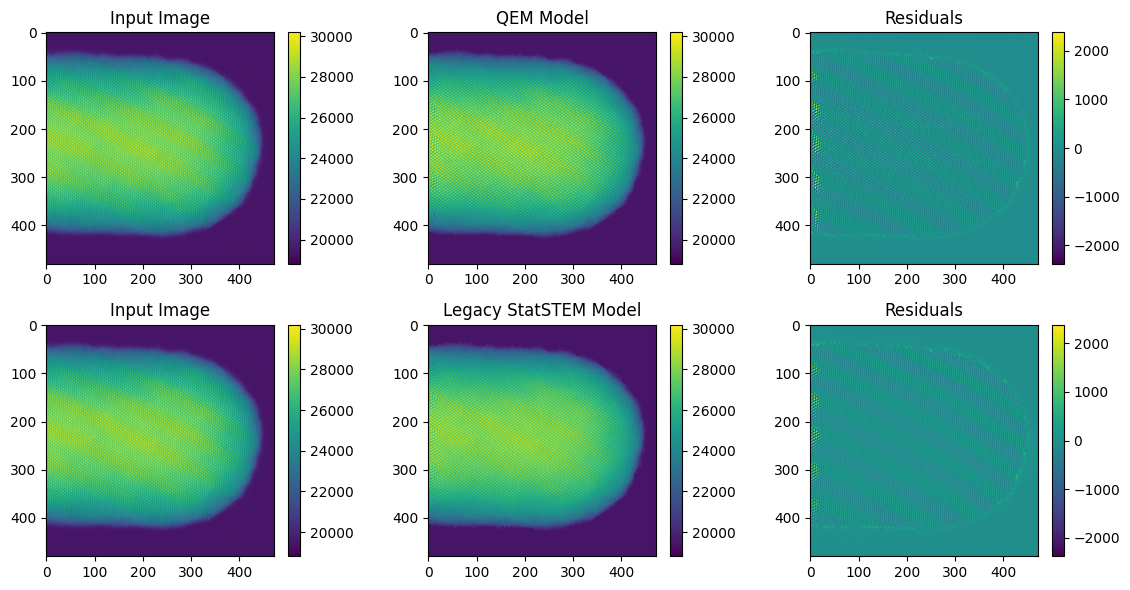

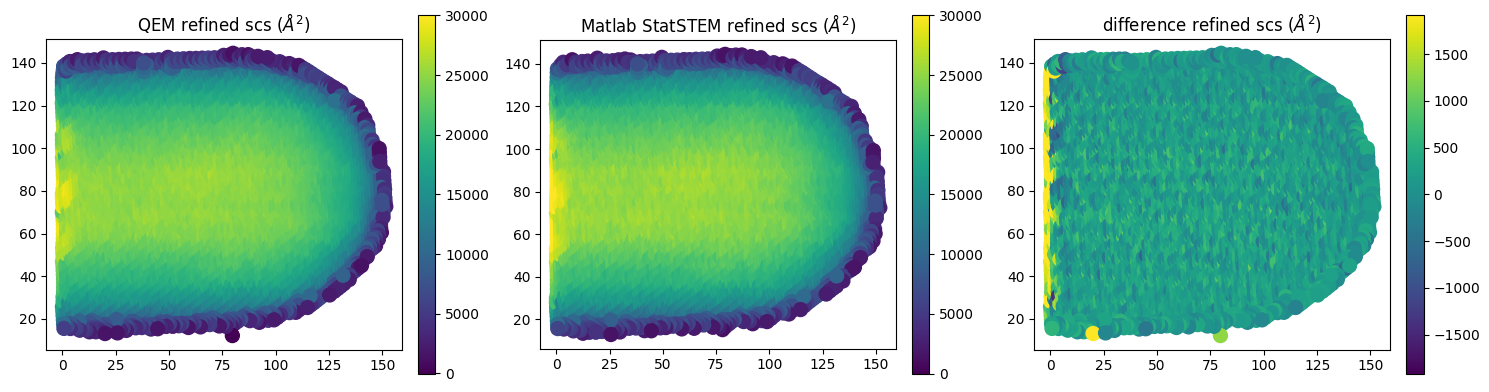

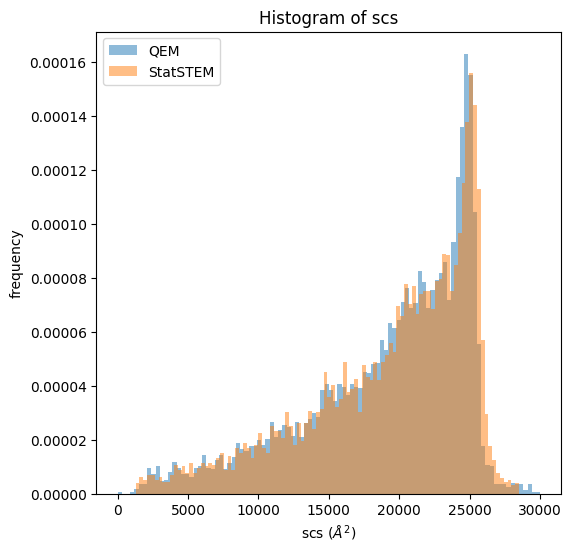

In [1]:
from qem.benchmark import Benchmark
from glob import glob

file_list = glob('/home/zzhang/OneDrive/code/qem/data/testFitProgram/*.mat')
error_list = []

for file in file_list[:1]:
    print(file)
    benchmark = Benchmark(file)
    benchmark.refine(plot=False,verbose=False, guess_radius=True)
    folder_path = file.split('.')[0]
    benchmark.compare_residual(folder_path=folder_path,save=True)
    benchmark.compare_scs_map(folder_path=folder_path,save=True)
    benchmark.compare_scs_histogram(folder_path=folder_path,save=True)
    error = benchmark.scs_relative_error()
    error_list.append(error)

In [2]:
file_list

['/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputGMMrodEmeric_110_final.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/output_fivefoldsymmetry2015_121416_2.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_RT_RevSTEM90_STEMdataset_778x842_3_final_64_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/outputStatSTEM_Right_330_RevSTEM90_STEMdataset_802x814_3_final_60_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_H2_1_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_H2_after_O2_flow_5_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_Aurod_0_2016.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_300C_O2_after_O2_and_H2_flow_1_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_200C_no_gas_1_1_conv_1_rotated.mat',
 '/home/zzhang/OneDrive/code/qem/data/testFitProgra

In [2]:
from qem.fitting import ImageModelFitting
import qem
file ='/home/zzhang/OneDrive/code/qem/data/testFitProgram/StatSTEM_Aurod_+45_2016.mat'
legacyStatSTEM = qem.io.read_legacyInputStatSTEM(file)

# model=ImageModelFitting(image, pixel_size=dx)

In [3]:
legacyStatSTEM.keys()

dict_keys(['input', 'GUI', 'output', 'atomcounting'])

In [20]:
from sklearn.ensemble import IsolationForest

data = benchmark.scs_statstem.reshape(-1,1)  # Reshape for compatibility with sklearn
clf = IsolationForest(contamination=0.01)  # Estimate of the contamination of the data
preds = clf.fit_predict(data)
outliers = data[preds == -1]

In [21]:
outliers

array([[ 2.54156243e+02],
       [ 1.71908806e+05],
       [ 1.72732354e+05],
       [ 1.71250654e+05],
       [ 1.72508167e+05],
       [ 1.71133765e+05],
       [ 1.76636701e+05],
       [ 1.72567360e+05],
       [ 1.77522193e+05],
       [ 1.72490567e+05],
       [ 1.96589216e+05],
       [-8.60999792e+08],
       [ 1.13899644e+12],
       [-1.13899643e+12],
       [-5.07383797e+03],
       [ 5.24575659e+03],
       [-1.70768947e+05],
       [ 8.61040353e+08],
       [ 5.39398278e+03],
       [ 5.04301245e+03],
       [ 1.21293792e+08],
       [-1.21279839e+08],
       [ 1.17191845e+09],
       [-1.17189476e+09],
       [-7.10842592e+03],
       [-3.35199137e+04],
       [-1.09242637e+05],
       [-2.86036612e+04],
       [ 7.66310654e+06],
       [-7.63102389e+06],
       [-1.03753839e+03],
       [ 5.36183755e+03],
       [-1.46951044e+08],
       [-1.03828608e+04],
       [ 1.46958189e+08],
       [-8.05582298e+03],
       [-1.71522530e+03]])

Text(0.5, 1.0, 'Histogram of scs')

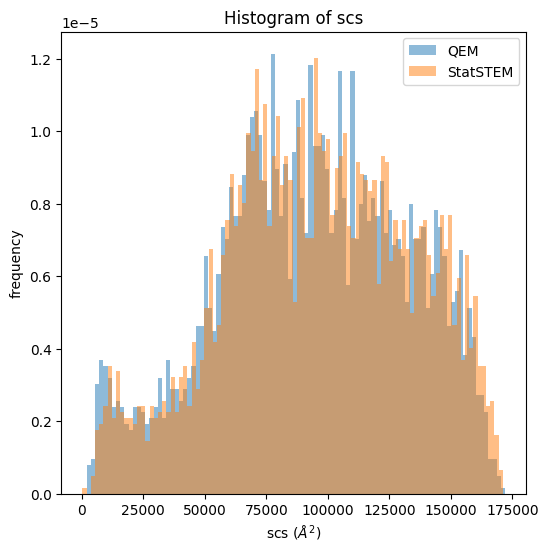

In [27]:
import matplotlib.pyplot as plt
import numpy as np
volume_qem = benchmark.scs_qem
volume_statstem = benchmark.scs_statstem
# remove outliners of volume_statstem
data = volume_statstem.reshape(-1,1)  # Reshape for compatibility with sklearn
clf = IsolationForest(contamination=0.01)  # Estimate of the contamination of the data
preds = clf.fit_predict(data)
outliers = data[preds == -1].reshape(-1)
# only keep the outliers that larger than the mean
outliers = outliers[outliers>np.mean(volume_statstem)]
# remove outliers from volume_statstem
volume_statstem = volume_statstem[np.isin(volume_statstem, outliers, invert=True)]
volume_statstem = volume_statstem[volume_statstem>0] # remove negative values

plt.figure(figsize=(6,6))
plt.hist(volume_qem, bins=100, alpha=0.5, label='QEM', density=True)
plt.hist(volume_statstem, bins=100, alpha=0.5, label='StatSTEM', density=True)
plt.xlabel('scs ($\AA^2$)')
plt.ylabel('frequency')
plt.legend()
plt.title('Histogram of scs')

In [3]:
benchmark.scs_qem.min()

-1357.792406633527

In [2]:
error_list

[0.3506405266624348]